### Agnieszka Wrzos

# Data Analysis of nyc flights (2013)

#### Packages:

In [1]:
from nycflights13 import flights
import pandas as pd
import seaborn 
import matplotlib.pyplot as plt

# Quick view into data

In this project I'm going to use **nycflights13** package, which was implemented to provide the data from R package **nycflights13**. It contains data from all flights departing NYC in 2013.

*https://cran.r-project.org/web/packages/nycflights13/index.html*

In [2]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


# Data Preparation

In [3]:
# table with cancelled flights
flights0=pd.DataFrame(flights)

In [4]:
# Creating a table with NaN rows removed, since flights that were cancelled won't be used in many cases.
# table without cancelled flights
flights1 = pd.DataFrame.dropna(flights)

In [5]:
print(f'There were {336776-327346} flights cancelled.')

There were 9430 flights cancelled.


# EDA

## Summary statistics 

In [6]:
flightsdf=pd.DataFrame(flights1)
print(flightsdf[['dep_delay','arr_delay','air_time','distance']].describe())

           dep_delay      arr_delay       air_time       distance
count  327346.000000  327346.000000  327346.000000  327346.000000
mean       12.555156       6.895377     150.686460    1048.371314
std        40.065688      44.633292      93.688305     735.908523
min       -43.000000     -86.000000      20.000000      80.000000
25%        -5.000000     -17.000000      82.000000     509.000000
50%        -2.000000      -5.000000     129.000000     888.000000
75%        11.000000      14.000000     192.000000    1389.000000
max      1301.000000    1272.000000     695.000000    4983.000000


### Departure Delays:
- The average departure delay for flights was $12.56$ mins;
- From $std=40.07$ we can infer that departure delays varies significantly from each other, and there are some extreme cases;
- The longest delay, was more than $21$ hours. ($1301$mins = $21.68$ hours);
- **dep_delay** with negative value means, that flight was departured prior to scheduled time. The most significant difference between scheduled departure and actual departure prior that time was $43$ mins.

### Arrival Delay:
- The average arrival delay for flights was $6.9$ mins;
- Most extreme cases were flights which arrived $86$ mins before and $1272$ mins ($21.2$ hours) after scheduled.

### Air Time:
- Average air time is $150.69$ mins, which is about $5$ hours; 
- The shortest flight time was $20$ mins, the longest - $695$ mins ($11.58$ hours).

### Distance:
- Average distance was $1048$ km;
- The smallest distance was $80$ km, biggest - $4983$ km.

## Departure Delay Time Grouped by Origin

In [7]:
flightsdf['origin'].value_counts()

EWR    117127
JFK    109079
LGA    101140
Name: origin, dtype: int64

EWR airport has the biggest amount of flights ($117127$), but the differences between the airports aren't that significant.

I'm going to find numerical summaries and boxplot of a data set.

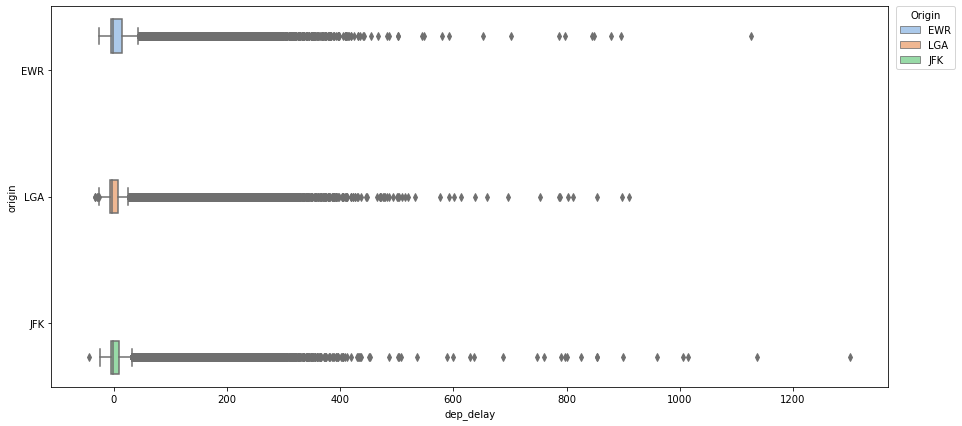

In [8]:
plt.rcParams["figure.figsize"] = (15,7)
ax = seaborn.boxplot(x="dep_delay", y="origin", hue="origin",
                 data=flights1, palette="pastel")
plt.legend(title="Origin", loc='upper right', bbox_to_anchor=(1.08, 1),borderaxespad=0)

In [9]:
flightsO = flightsdf.groupby(['origin']).describe()
print(flightsO['dep_delay'])

           count       mean        std   min  25%  50%   75%     max
origin                                                              
EWR     117127.0  15.009110  41.185208 -25.0 -4.0 -1.0  15.0  1126.0
JFK     109079.0  12.023607  38.827098 -43.0 -5.0 -1.0  10.0  1301.0
LGA     101140.0  10.286583  39.911298 -33.0 -6.0 -3.0   7.0   911.0


The longest delay $1301$ mins ($ \sim21.68$ h), and took place in JFK Airport. But it is the EWR Airport that has the biggest amount of long delays, what we can infer from highest count, mean and 75th percentile values. At the LGA Airport delays happend less often and were shorter. Also departures before time happened more frequently.

### Most delayed flights (Origin)

Now I'm going to create new variable `delay` (as summed departure and arrival delays), to check most delayed flights and Airport with most delayed flights.

In [10]:
flights2=flights1[["year","month","day","carrier","origin","dest","dep_delay","arr_delay"]]
pd.options.mode.chained_assignment = None

In [11]:
delaysum=flights2["dep_delay"]+flights2["arr_delay"]
flights2["delay"]=delaysum
flights2.sort_values("delay").tail(n=10)

,year,month,day,carrier,origin,dest,dep_delay,arr_delay,delay
195711,2013,5,3,MQ,EWR,ORD,878.0,875.0,1753.0
87238,2013,12,5,AA,EWR,MIA,896.0,878.0,1774.0
270987,2013,7,22,DL,LGA,ATL,898.0,895.0,1793.0
151974,2013,3,17,DL,LGA,MSP,911.0,915.0,1826.0
173992,2013,4,10,DL,JFK,TPA,960.0,931.0,1891.0
270376,2013,7,22,MQ,JFK,CVG,1005.0,989.0,1994.0
327043,2013,9,20,AA,JFK,SFO,1014.0,1007.0,2021.0
8239,2013,1,10,MQ,EWR,ORD,1126.0,1109.0,2235.0
235778,2013,6,15,MQ,JFK,CMH,1137.0,1127.0,2264.0
7072,2013,1,9,HA,JFK,HNL,1301.0,1272.0,2573.0


Most delayed flight was delayed $2573$ mins (almost $43$ hours).

In [12]:
flights2_O = flights2.groupby(['origin']).describe()
print(flights2_O['delay'])

           count       mean        std    min   25%  50%   75%     max
origin                                                                
EWR     117127.0  24.116165  85.135466 -100.0 -19.0 -4.0  29.0  2235.0
JFK     109079.0  17.575088  81.050496  -95.0 -21.0 -7.0  21.0  2573.0
LGA     101140.0  16.070071  81.937556  -91.0 -22.0 -8.0  17.0  1826.0


The biggest delay took place on JFK Airport, but overall the largest delays happens on EWR Airport. 

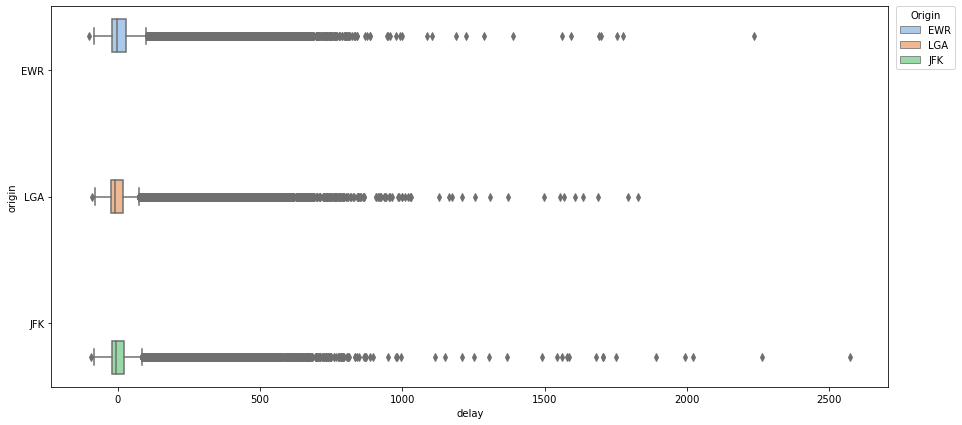

In [13]:
plt.rcParams["figure.figsize"] = (15,7)
ax = seaborn.boxplot(x="delay", y="origin", hue="origin",
                 data=flights2, palette="pastel")
plt.legend(title="Origin", loc='upper right', bbox_to_anchor=(1.08, 1),borderaxespad=0)

<AxesSubplot:xlabel='delay', ylabel='Count'>

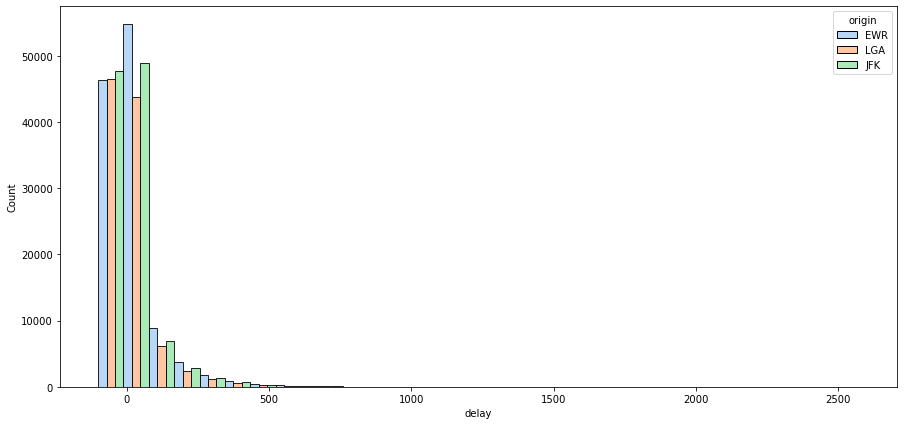

In [14]:
seaborn.histplot(x="delay", hue="origin",multiple="dodge", bins=30, palette="pastel",
                 data=flights2)

All of three histograms have right-skewed dystribution, which was also seen on boxplots (which contained many outliers). 

In [15]:
flights2_EWR=flights2.loc[flights2['origin'] == 'EWR']
flights2_JFK=flights2.loc[flights2['origin'] == 'JFK']
flights2_LGA=flights2.loc[flights2['origin'] == 'LGA']

skew_EWR=flights2_EWR["delay"].skew()
skew_JFK=flights2_JFK["delay"].skew()
skew_LGA=flights2_LGA["delay"].skew()
print("EWR: ", skew_EWR, "JFK: ", skew_JFK,"LGA: ", skew_LGA)

EWR:  3.8839524505395184 JFK:  4.922338907125289 LGA:  4.646178689379997


Distributions are unimodal, higly positively skewed (skweness $>1$). 

## Departure Delay Time with negative values removed

In order to gather more info about delays we will remove negative and missing values from dep_delay.

In [16]:
flights_positive = flightsdf[(flightsdf.sched_dep_time	>=0) &
                 (flightsdf.dep_delay>=0) &
                 (flightsdf.air_time>0) &
                 (flightsdf.distance > 0)]
flights_positive

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
15,2013,1,1,559.0,559,0.0,702.0,706,-4.0,B6,1806,N708JB,JFK,BOS,44.0,187,5,59,2013-01-01T10:00:00Z
17,2013,1,1,600.0,600,0.0,851.0,858,-7.0,B6,371,N595JB,LGA,FLL,152.0,1076,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336759,2013,9,30,2207.0,2140,27.0,2257.0,2250,7.0,MQ,3660,N532MQ,LGA,BNA,97.0,764,21,40,2013-10-01T01:00:00Z
336760,2013,9,30,2211.0,2059,72.0,2339.0,2242,57.0,EV,4672,N12145,EWR,STL,120.0,872,20,59,2013-10-01T00:00:00Z
336762,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,UA,471,N578UA,EWR,SFO,318.0,2565,21,13,2013-10-01T01:00:00Z
336763,2013,9,30,2235.0,2001,154.0,59.0,2249,130.0,B6,1083,N804JB,JFK,MCO,123.0,944,20,1,2013-10-01T00:00:00Z


In [17]:
flights_months = flights_positive.month.value_counts(ascending=True)
flights_months

9      8987
11     9596
10    10173
2     10252
1     11024
4     11722
3     12594
5     12615
8     13202
6     13870
12    14977
7     15199
Name: month, dtype: int64

[Text(0.5, 0, 'month'), Text(0, 0.5, 'number of flights')]

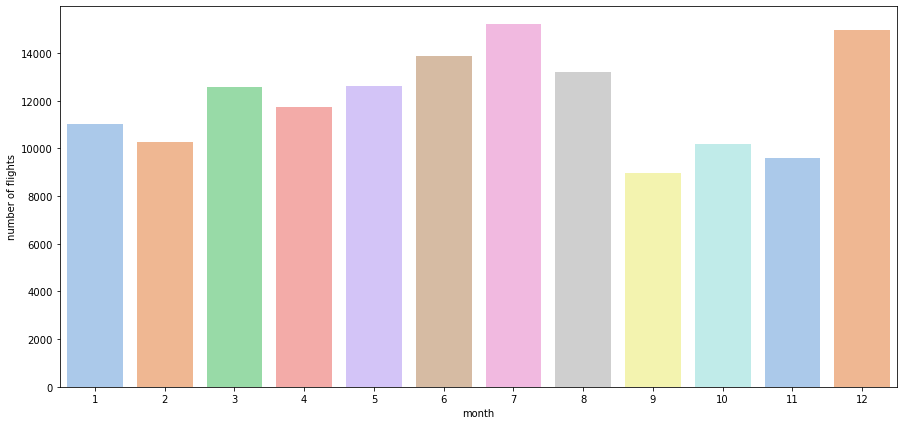

In [18]:
ax=seaborn.barplot(x=flights_months.index, y=flights_months.values, palette='pastel')
ax.set(xlabel="month", ylabel = "number of flights")

The smallest departure delays occured in september. The largest during vacation (July, June, August) and in december which can be due to christmas and New Year's Eve. 

In [20]:
flights_months_O = flights_positive.groupby(["month","origin"],as_index=False).size()
flights_months_O.columns=['month', 'origin', 'number_of_flights']
flights_months_O.style.hide_index()

month,origin,number_of_flights
1,EWR,4824
1,JFK,3638
1,LGA,2562
2,EWR,4156
2,JFK,3553
2,LGA,2543
3,EWR,5265
3,JFK,4062
3,LGA,3267
4,EWR,4951


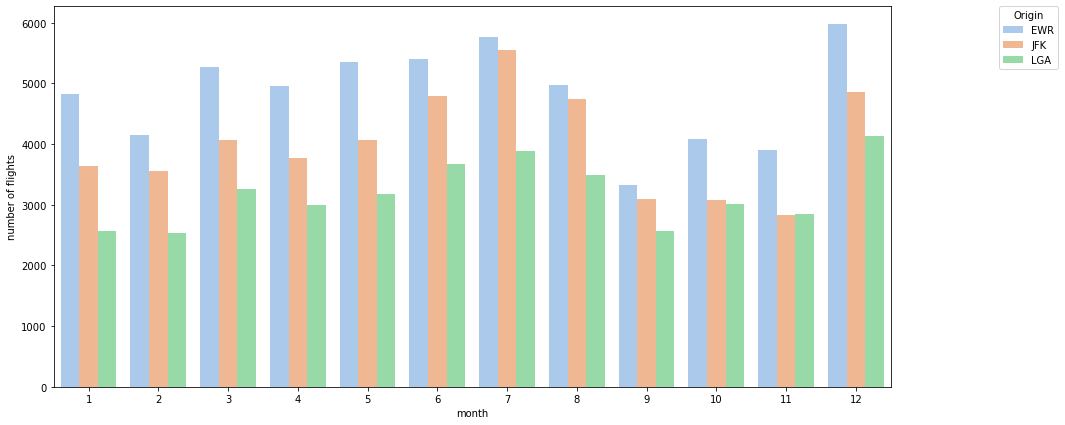

In [21]:
ax=seaborn.barplot(data=flights_months_O, x="month", y="number_of_flights", hue="origin", palette='pastel')
ax.set(xlabel="month", ylabel = "number of flights")
plt.legend(title="Origin", loc='upper right', bbox_to_anchor=(1.2, 1),borderaxespad=0)


The smallest departure delays occured in Autumn. The largest during vacation (July, June, August) and in december.

In [ ]:
flights_months_O_sort=flights_months_O.sort_values('number_of_flights')
flights_months_O_sort.iloc[[0, -1]]

The smallest  number of flights ($2543$) occured on LGA Airport in February, and the highest ($5973$) on EWR Airport in December  .

## Carriers' liability for flight delays

5 carriers with the lowest/highest percentage of delayed flights

Crosstab to display the number of diverted flights for each carrier-airport pair, without null values.

In [22]:
flights2_nof=flights2.groupby(["carrier"]).size().reset_index(name='number_of_flights')
flights2_nof.sort_values("number_of_flights").iloc[[0, -1]].style.hide_index()

carrier,number_of_flights
OO,29
UA,57782


There are 16 carriers, which contains different numbers of flights from $29$ to $57782$. Firstly I'm going to perform sums of of delays.

In [23]:
flights2_Carr=flights2.groupby('carrier')['delay'].sum().reset_index(name='sum_of_delays')

delaysum=flights2_nof["number_of_flights"]
flights2_Carr["number_of_flights"]=delaysum

delaysum2=flights2_Carr["sum_of_delays"]/flights2_Carr["number_of_flights"]
flights2_Carr["mins_of_delay_per_flight"]=delaysum2

flights2_Carr.sort_values("mins_of_delay_per_flight").style.hide_index()

carrier,sum_of_delays,number_of_flights,mins_of_delay_per_flight
AS,-2907.000000,709,-4.100141
HA,-689.000000,342,-2.014620
US,116493.000000,19831,5.874288
AA,285396.000000,31947,8.933421
DL,517961.000000,47658,10.868291
VX,74290.000000,5116,14.521110
UA,899950.000000,57782,15.574920
MQ,531288.000000,25037,21.220114
B6,1212077.000000,54049,22.425521
9E,411930.000000,17294,23.819244


Difference between number of flights is big, so it is useful to present mins of delay per flight. Now I'm going to check how many from all flights were diverted for each carrier.

In [34]:
flights2_Carr2=flights2_Carr[["carrier","number_of_flights"]]

num_of_punctual=flights2.groupby(['carrier']).delay.value_counts().unstack(fill_value=0).loc[:,0].tolist()
flights2_Carr2['number_of_punctual_flights']=num_of_punctual


flights_positive2 = flights2[(flights2.delay>0)]
flights_positive3=flights_positive2.groupby(["carrier"]).size().reset_index(name='number_of_flights')


flights2_Carr2['number_of_delayed_flights']=flights_positive3['number_of_flights']


flights01=flights0[["carrier","dep_delay"]]
flights01[['dep_delay']] = flights01[['dep_delay']].fillna('cancelled')
flights02=flights01[flights01.dep_delay=="cancelled"]
flights03=flights02['dep_delay'].eq('cancelled').view('i1').groupby(flights02['carrier']).agg(['count'])
flights03.columns=['number']


flights2_Carr2.reset_index(inplace=True)
flights2_Carr2.set_index('carrier',inplace=True)
flights2_Carr2['number_of_cancelled_flights']=flights03['number']




flights2_Carr2['percentage_of_delayed_flights']=flights2_Carr2['number_of_delayed_flights']/flights2_Carr2['number_of_flights']*100
flights2_Carr2["percentage_of_delayed_flights"]= flights2_Carr2["percentage_of_delayed_flights"].round(2)
flights2_Carr2=flights2_Carr2.fillna(0)
flights2_Carr2["number_of_cancelled_flights"]= flights2_Carr2["number_of_cancelled_flights"].astype(int)
flights2_Carr2.sort_values("percentage_of_delayed_flights")


,index,number_of_flights,number_of_punctual_flights,number_of_delayed_flights,number_of_cancelled_flights,percentage_of_delayed_flights
carrier,,,,,,
HA,8,342,2,87,0,25.44
AS,2,709,6,191,2,26.94
OO,10,29,1,8,3,27.59
US,12,19831,280,6597,663,33.27
AA,1,31947,352,10668,636,33.39
DL,4,47658,593,16616,349,34.87
VX,13,5116,80,1888,31,36.90
9E,0,17294,179,6892,1044,39.85
UA,11,57782,710,24514,686,42.42


The table is sorted by the last column (percentage of delayed flights). 
We can notice that:
- Carrier OO had the smallest number of flights ($29$), and carrier UA - the largest ($57782$),
- number of punctual flights is drasticly small compared to number of delayed flights, and still in most cases (9 from 16) smaller than number of cancelled flights(!),
- Carrier HA has the smallest percentage of delayed flights, which is $25.44$%,
- Carrier F9 has the highest percentage of delayed flights - $60.5$%.